In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import matplotlib.cm as cm
import keras
from keras import backend as K

import time

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/KAGGLE/DATASET-KAGGLE-brain-tumor-mri-image/Training'
test_dir = '/content/drive/MyDrive/KAGGLE/DATASET-KAGGLE-brain-tumor-mri-image/Testing'

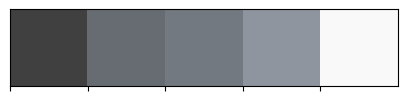

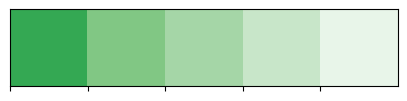

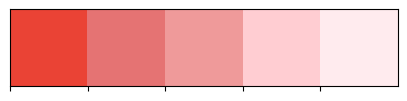

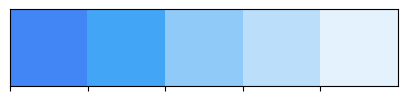

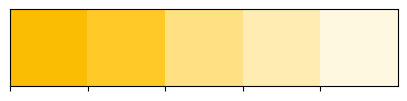

In [ ]:
colors_dark = ["#404040", "#676c72", '#737980', '#8e959e', '#f9f9f9']
colors_red = ["#EA4335", "#E57373", '#EF9A9A', '#FFCDD2', '#FFEBEE']
colors_green = ['#34A853','#81C784','#A5D6A7','#C8E6C9','#E8F5E9']
colors_blue = ['#4285F4','#42A5F5','#90CAF9','#BBDEFB','#E3F2FD']
colors_yellow = ['#FBBC04','#FFCA28','#FFE082','#FFECB3','#FFF8E1']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_blue)
sns.palplot(colors_yellow)

In [ ]:
labels = ['glioma','notumor','meningioma','pituitary']

In [ ]:
# X_train - treinamento imagens
# y_train - treinamento labels

train_img = []
train_labels = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/KAGGLE/DATASET-KAGGLE-brain-tumor-mri-image/','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        train_img.append(img)
        train_labels.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/KAGGLE/DATASET-KAGGLE-brain-tumor-mri-image/','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        train_img.append(img)
        train_labels.append(i)

train_img = np.array(train_img)
train_labels = np.array(train_labels)

100%|██████████| 300/300 [00:03<00:00, 88.84it/s] 


In [ ]:
len(train_labels)

6983

In [ ]:
np.unique(train_labels, return_counts=True)

(array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype='<U10'),
 array([1611, 1635, 1990, 1747]))

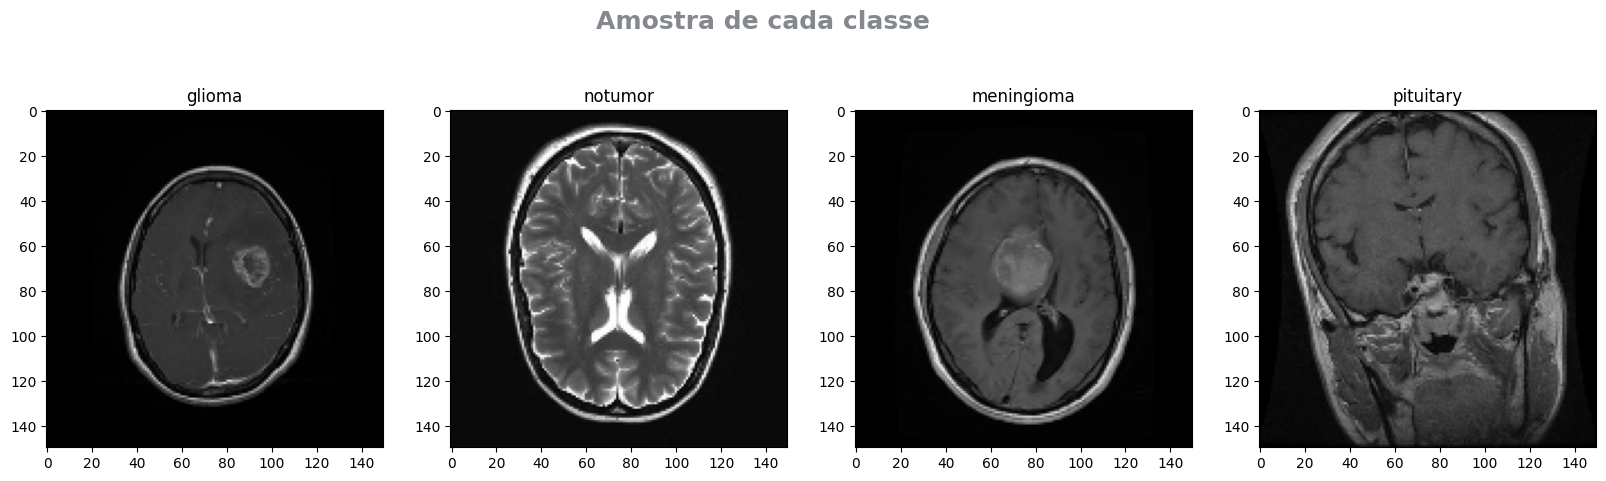

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Amostra de cada classe',size=18,fontweight='bold',
             color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :   ### substituir por um for de k até 12
        if train_labels[j]==i:
            ax[k].imshow(train_img[j])
            ax[k].set_title(train_labels[j])
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(train_img,train_labels, random_state=101)

In [ ]:
X_train.shape

(6983, 150, 150, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
X_test.shape

(699, 150, 150, 3)

In [ ]:
X_train.shape

(6284, 150, 150, 3)

In [ ]:
X_test.shape

(699, 150, 150, 3)

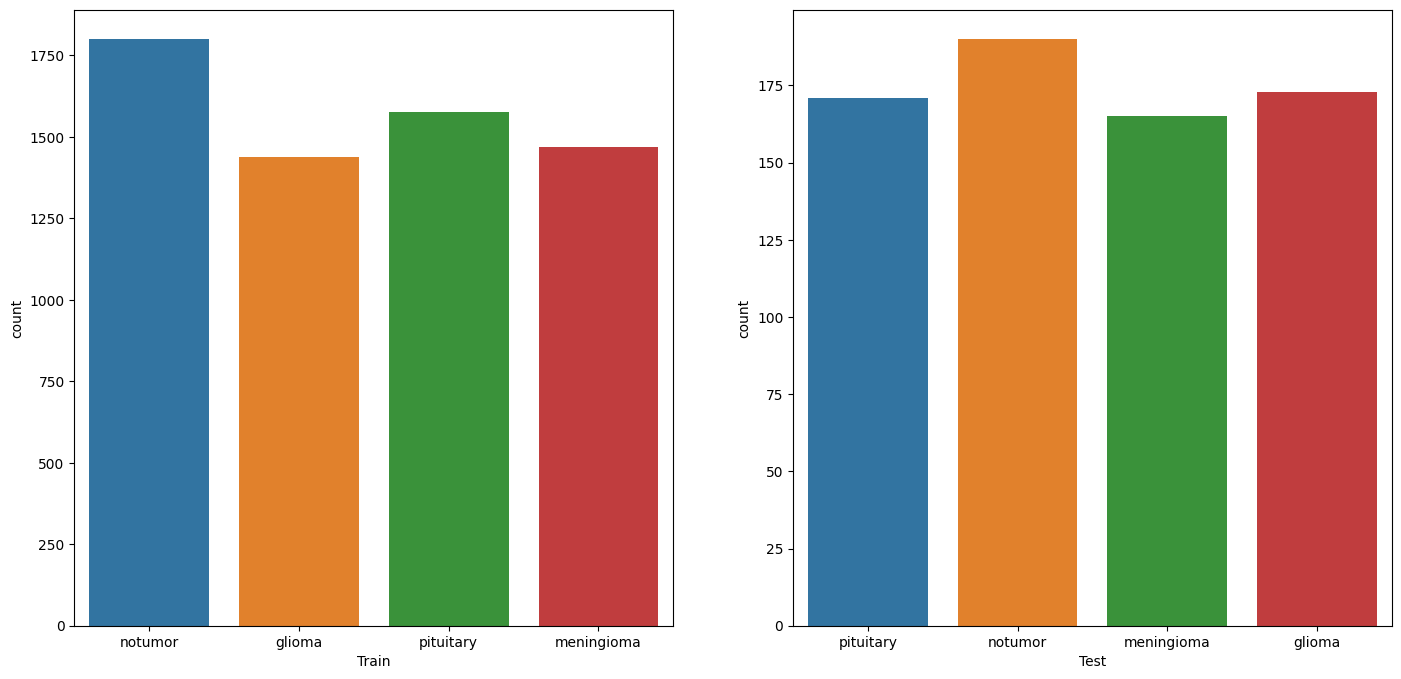

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

0
Train
['notumor' 'glioma' 'glioma' ... 'glioma' 'meningioma' 'glioma']
Axes(0.125,0.11;0.775x0.77)
1
Test
['pituitary' 'notumor' 'pituitary' 'notumor' 'pituitary' 'meningioma'
 'glioma' 'meningioma' 'notumor' 'notumor' 'glioma' 'notumor' 'notumor'
 'glioma' 'glioma' 'notumor' 'meningioma' 'pituitary' 'notumor'
 'pituitary' 'meningioma' 'glioma' 'glioma' 'notumor' 'meningioma'
 'pituitary' 'pituitary' 'meningioma' 'notumor' 'pituitary' 'notumor'
 'notumor' 'notumor' 'pituitary' 'glioma' 'glioma' 'notumor' 'glioma'
 'notumor' 'notumor' 'meningioma' 'meningioma' 'meningioma' 'glioma'
 'glioma' 'notumor' 'notumor' 'glioma' 'pituitary' 'pituitary' 'notumor'
 'pituitary' 'glioma' 'pituitary' 'meningioma' 'pituitary' 'glioma'
 'meningioma' 'notumor' 'meningioma' 'notumor' 'notumor' 'glioma' 'glioma'
 'meningioma' 'glioma' 'pituitary' 'glioma' 'glioma' 'pituitary' 'glioma'
 'glioma' 'pituitary' 'glioma' 'meningioma' 'pituitary' 'meningioma'
 'pituitary' 'pituitary' 'pituitary' 'glioma' 'glio

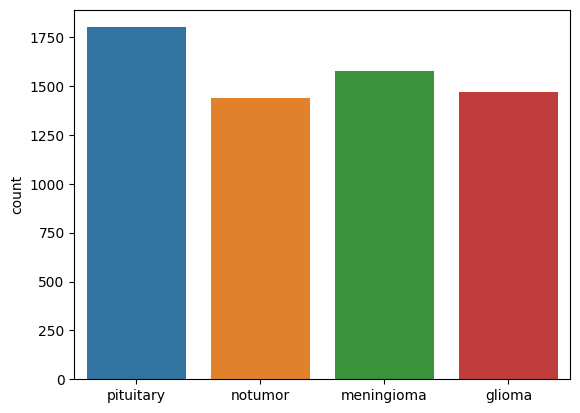

In [ ]:
for i,j in enumerate([y_train, y_test]):
    print(i)
    print(lis[i])
    print(j)
    print(sns.countplot(x = j))

In [ ]:
X_train

array([[[[16, 16, 16],
         [16, 16, 16],
         [16, 16, 16],
         ...,
         [14, 14, 14],
         [14, 14, 14],
         [40, 40, 40]],

        [[16, 16, 16],
         [16, 16, 16],
         [16, 16, 16],
         ...,
         [14, 14, 14],
         [14, 14, 14],
         [40, 40, 40]],

        [[16, 16, 16],
         [16, 16, 16],
         [16, 16, 16],
         ...,
         [14, 14, 14],
         [14, 14, 14],
         [40, 40, 40]],

        ...,

        [[14, 14, 14],
         [14, 14, 14],
         [14, 14, 14],
         ...,
         [14, 14, 14],
         [14, 14, 14],
         [40, 40, 40]],

        [[14, 14, 14],
         [14, 14, 14],
         [14, 14, 14],
         ...,
         [14, 14, 14],
         [13, 13, 13],
         [41, 41, 41]],

        [[40, 40, 40],
         [40, 40, 40],
         [40, 40, 40],
         ...,
         [39, 39, 39],
         [39, 39, 39],
         [62, 62, 62]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### transfer learning!

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

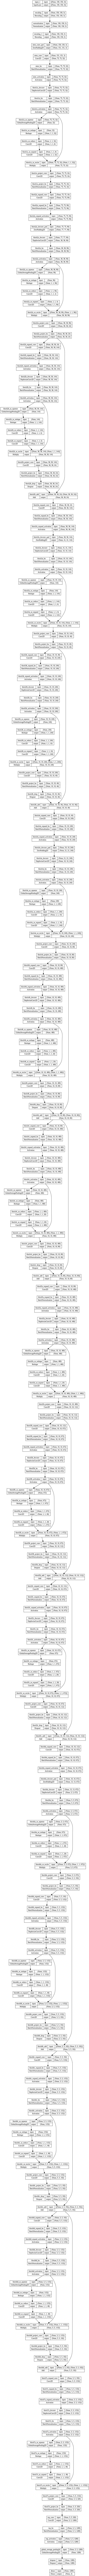

In [ ]:
plot_model(model, to_file='model_eff_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.3 MB/s eta 0:00:00


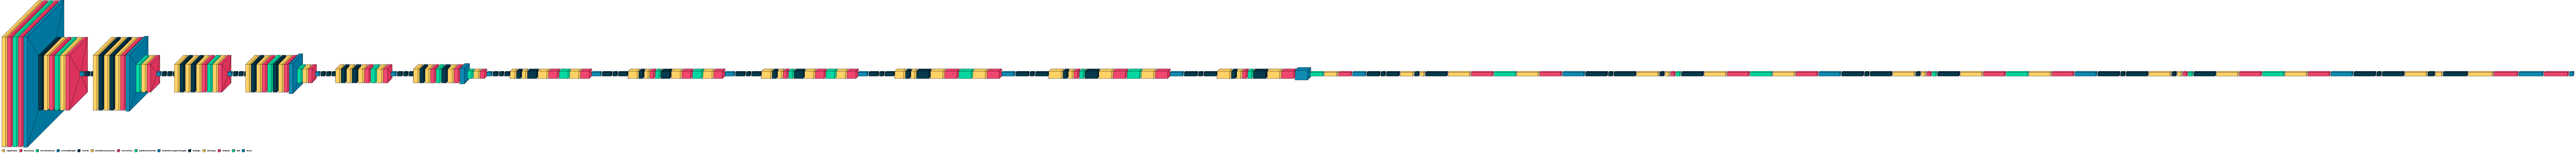

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score # metrics
metrics_names = ["accuracy", "precision", "recall", "f1-score"]
metrics = ["accuracy", Precision(name="precision"), Recall(name="recall"), F1Score(name="f1-score")]

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

### cross-validation

In [ ]:
VALIDATION_ACCURACY1 = []
VALIDATION_LOSS1 = []

HISTORIES1ACC =[]
HISTORIES1VALACC =[]

HISTORIES1LOSS =[]
HISTORIES1VALLOSS =[]

HISTORIES1PRECISION =[]
HISTORIES1RECALL = []

HISTORIES1VALPRECISION =[]
HISTORIES1VALRECALL = []



In [ ]:
fold=1
from sklearn.model_selection import KFold
from tensorflow.keras.models import save_model, load_model
skf = KFold(n_splits=5)

start_time = time.time()

for train_index, test_index in skf.split(X_train, y_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold} ...')
    Xt, Xv = X_train[train_index], X_train[test_index]
    yt, yv = y_train[train_index], y_train[test_index]

    # modelo
    effnet1 = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

    model1 = effnet1.output
    model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
    model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
    model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
    model1 = tf.keras.models.Model(inputs=effnet1.input, outputs = model1)

    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)
    history1=model1.fit(Xt, yt, validation_data=(Xv, yv), epochs=30, batch_size=32, verbose=2,callbacks=reduce_lr)
    results1 = model1.evaluate(Xv, yv, verbose=0)
    results1 = dict(zip(model1.metrics_names,results1))

    VALIDATION_ACCURACY1.append(results1['accuracy'])
    VALIDATION_LOSS1.append(results1['loss'])


    fold+=1

    # salvando o histórico
    HISTORIES1ACC.append(history1.history['accuracy'])
    HISTORIES1LOSS.append(history1.history['loss'])
    HISTORIES1VALACC.append(history1.history['val_accuracy'])
    HISTORIES1VALLOSS.append(history1.history['val_loss'])
    HISTORIES1PRECISION.append(history1.history['precision'])
    HISTORIES1RECALL.append(history1.history['recall'])
    HISTORIES1VALPRECISION.append(history1.history['val_precision'])
    HISTORIES1VALRECALL.append(history1.history['val_recall'])

final_time = time.time() - start_time
print(f"Tempo de execução para os folds: {final_time}s")

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
158/158 - 69s - loss: 0.3061 - accuracy: 0.8914 - precision: 0.9132 - recall: 0.8689 - f1-score: 0.8873 - val_loss: 0.1650 - val_accuracy: 0.9483 - val_precision: 0.9563 - val_recall: 0.9411 - val_f1-score: 0.9452 - lr: 0.0010 - 69s/epoch - 434ms/step
Epoch 2/30
158/158 - 21s - loss: 0.1114 - accuracy: 0.9608 - precision: 0.9639 - recall: 0.9566 - f1-score: 0.9593 - val_loss: 0.0737 - val_accuracy: 0.9753 - val_precision: 0.9753 - val_recall: 0.9745 - val_f1-score: 0.9745 - lr: 0.0010 - 21s/epoch - 132ms/step
Epoch 3/30
158/158 - 21s - loss: 0.0777 - accuracy: 0.9761 - precision: 0.9773 - recall: 0.9751 - f1-score: 0.9755 - val_loss: 0.0662 - val_accuracy: 0.9777 - val_precision: 0.9816 - val_recall: 0.9761 - val_f1-score: 0.9769 - lr: 0.0010 - 21s/epoch - 134ms/step
Epoch 4/30
158/158 - 22s - loss: 0.0632 - accuracy: 0.9797 - precision: 0.9808 - recall: 0.9777 - f1-score: 0.9790

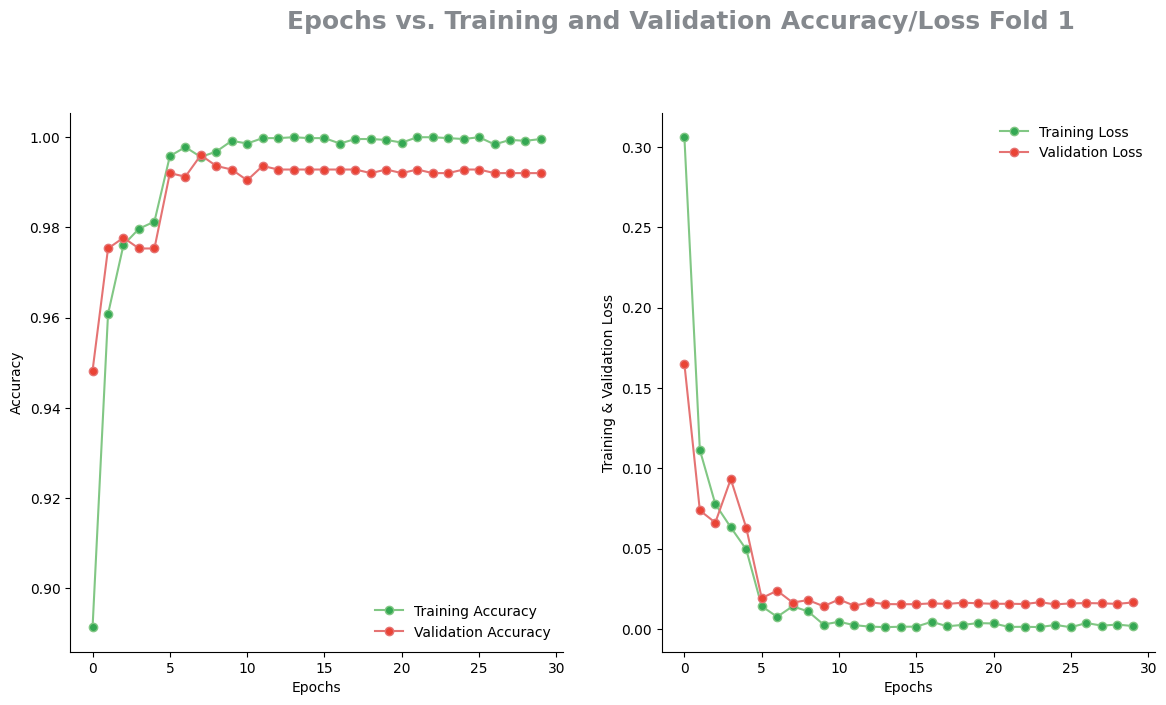

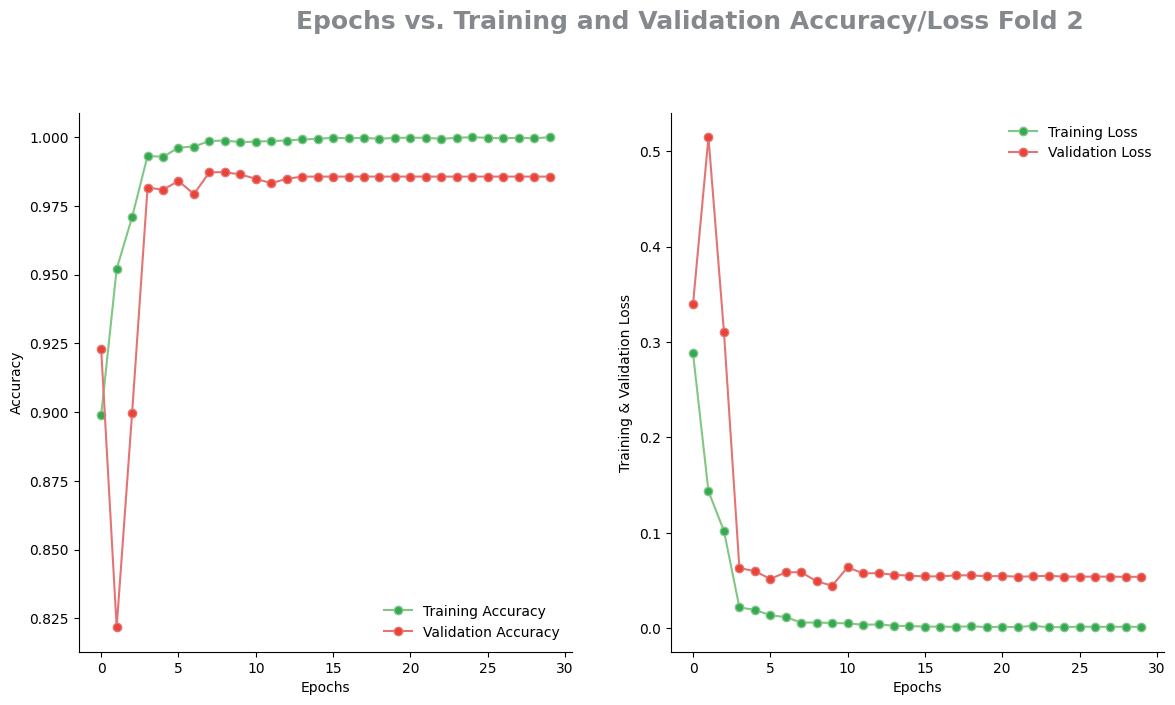

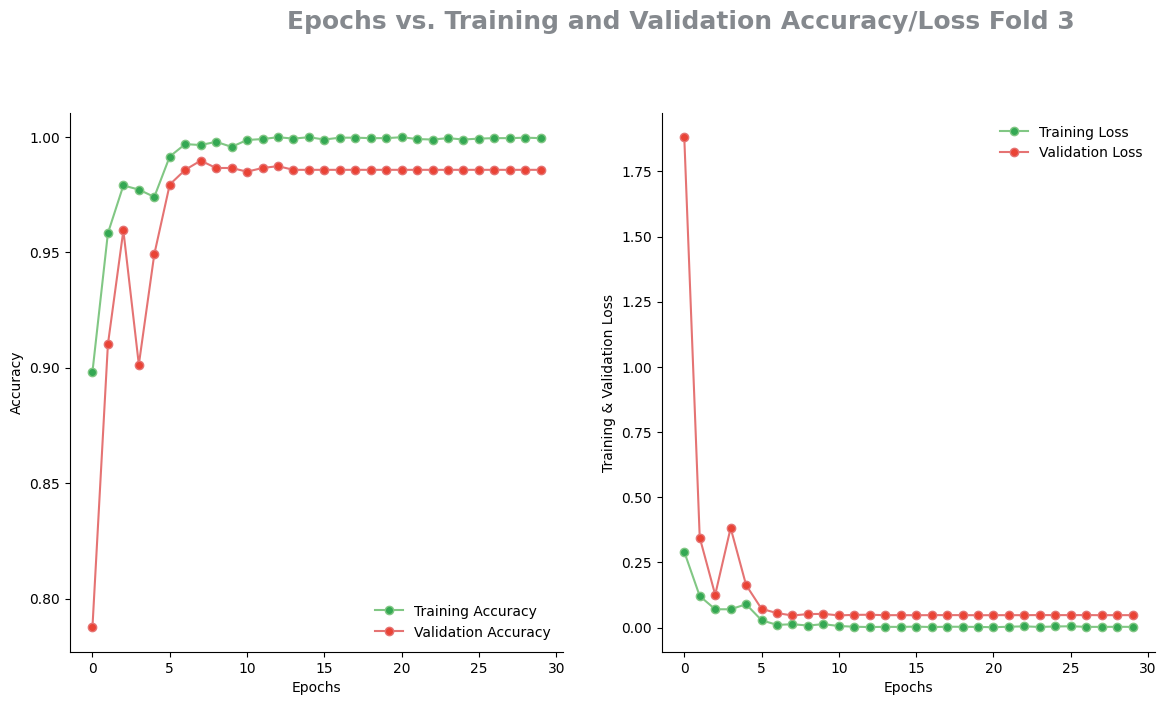

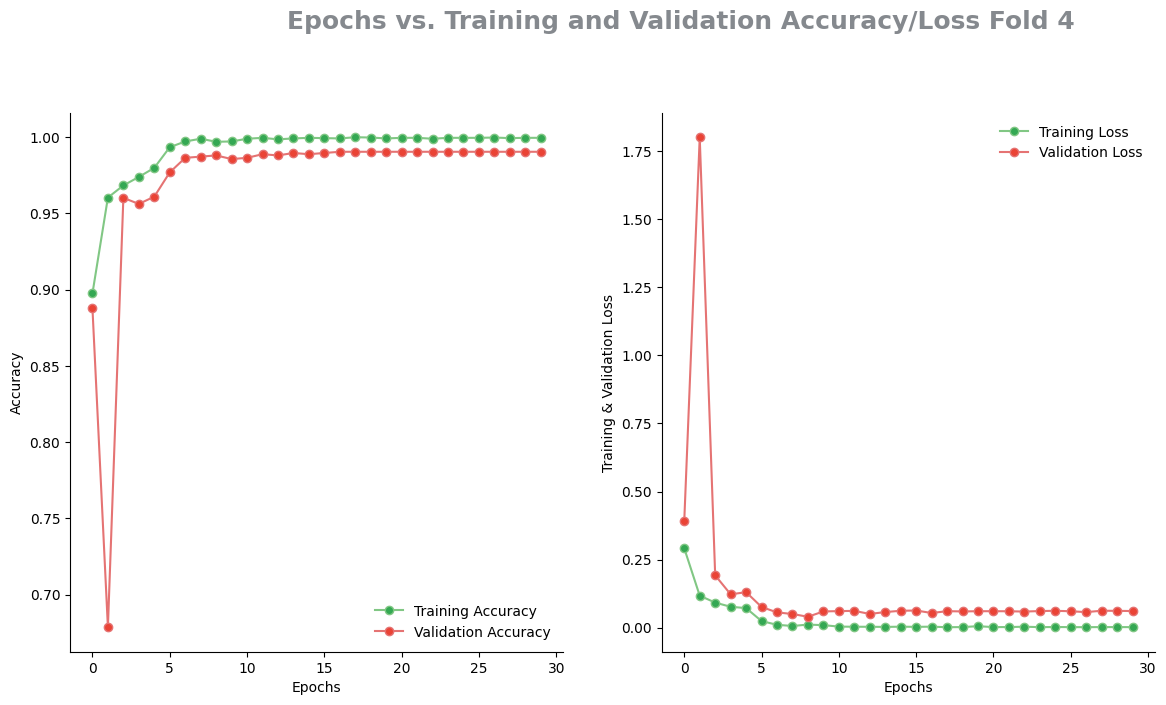

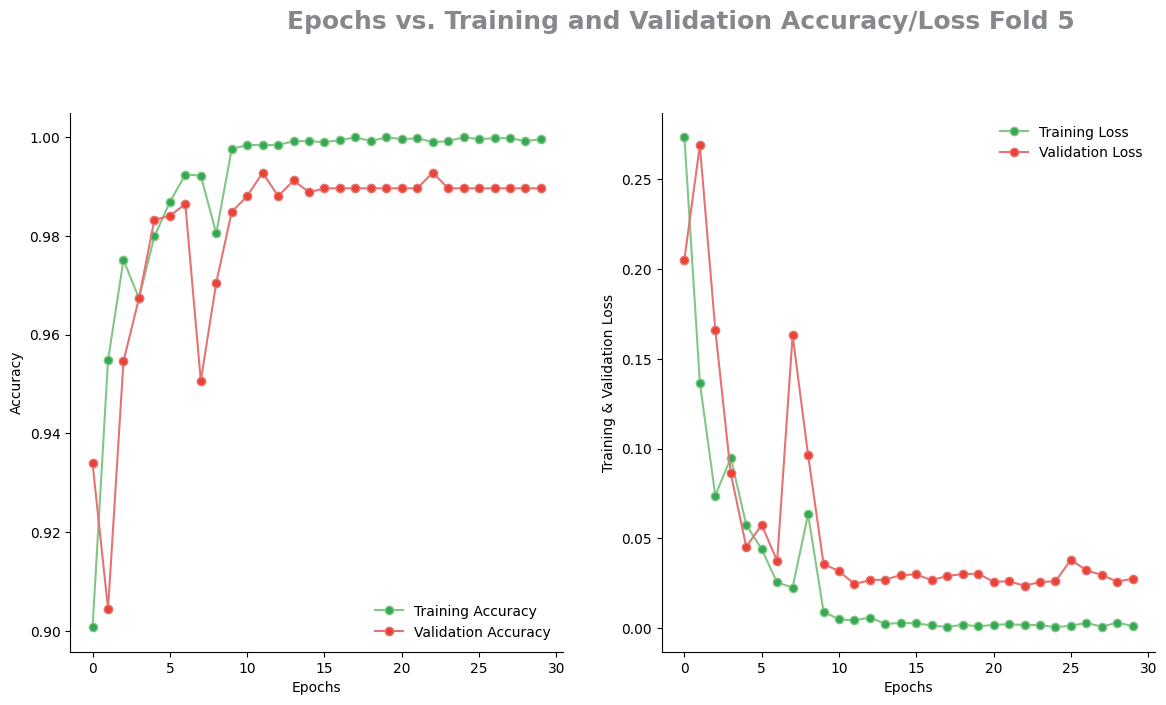

In [ ]:
epochs = [i for i in range(30)]
fig, ax = plt.subplots(1,2,figsize=(14,7))

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss Fold 1',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, HISTORIES1ACC[0], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, HISTORIES1VALACC[0], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, HISTORIES1LOSS[0], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, HISTORIES1VALLOSS[0], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

###

fig, ax = plt.subplots(1,2,figsize=(14,7))

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss Fold 2',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, HISTORIES1ACC[1], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, HISTORIES1VALACC[1], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, HISTORIES1LOSS[1], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, HISTORIES1VALLOSS[1], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

###

fig, ax = plt.subplots(1,2,figsize=(14,7))

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss Fold 3',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, HISTORIES1ACC[2], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, HISTORIES1VALACC[2], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, HISTORIES1LOSS[2], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, HISTORIES1VALLOSS[2], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

###

fig, ax = plt.subplots(1,2,figsize=(14,7))

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss Fold 4',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, HISTORIES1ACC[3], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, HISTORIES1VALACC[3], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, HISTORIES1LOSS[3], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, HISTORIES1VALLOSS[3], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

###

fig, ax = plt.subplots(1,2,figsize=(14,7))

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss Fold 5',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, HISTORIES1ACC[4], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, HISTORIES1VALACC[4], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, HISTORIES1LOSS[4], marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, HISTORIES1VALLOSS[4], marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
hist1_acc = np.array(HISTORIES1ACC)
hist1_loss = np.array(HISTORIES1LOSS)
hist1_valacc = np.array(HISTORIES1VALACC)
hist1_valloss = np.array(HISTORIES1VALLOSS)


hist1_prec = np.array(HISTORIES1PRECISION)
hist1_rec= np.array(HISTORIES1RECALL)
hist1_valprec = np.array(HISTORIES1VALPRECISION)
hist1_valrec = np.array(HISTORIES1VALRECALL)


n_epochs=10
mean1_acc = np.zeros(n_epochs)
mean1_loss = np.zeros(n_epochs)
mean1_valloss = np.zeros(n_epochs)
mean1_valacc = np.zeros(n_epochs)

mean1_prec = np.zeros(n_epochs)
mean1_rec = np.zeros(n_epochs)
mean1_valprec = np.zeros(n_epochs)
mean1_valrec = np.zeros(n_epochs)



for i in range(0,n_epochs):
    for j in range(0, 5):
        mean1_acc[i]=mean1_acc[i]+hist1_acc[j,i]
        mean1_loss[i]=mean1_loss[i]+hist1_loss[j,i]
        mean1_valloss[i]=mean1_valloss[i]+hist1_valloss[j,i]
        mean1_valacc[i]=mean1_valacc[i]+hist1_valacc[j,i]
        mean1_prec[i]=mean1_prec[i]+hist1_prec[j,i]
        mean1_rec[i]=mean1_rec[i]+hist1_rec[j,i]
        mean1_valprec[i]=mean1_valprec[i]+hist1_valprec[j,i]
        mean1_valrec[i]=mean1_valrec[i]+hist1_valrec[j,i]

    mean1_acc[i]=mean1_acc[i]/5
    mean1_loss[i]=mean1_loss[i]/5
    mean1_valloss[i]=mean1_valloss[i]/5
    mean1_valacc[i]=mean1_valacc[i]/5
    mean1_prec[i]=mean1_prec[i]/5
    mean1_rec[i]=mean1_rec[i]/5
    mean1_valprec[i]=mean1_valprec[i]/5
    mean1_valrec[i]=mean1_valrec[i]/5

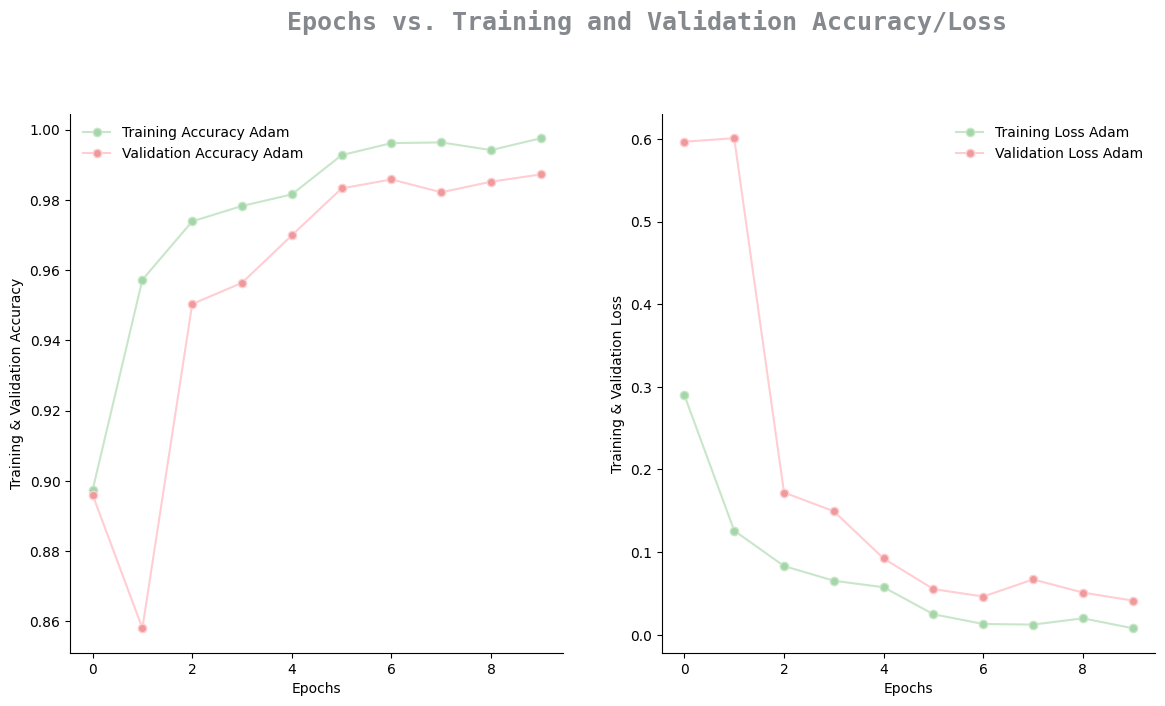

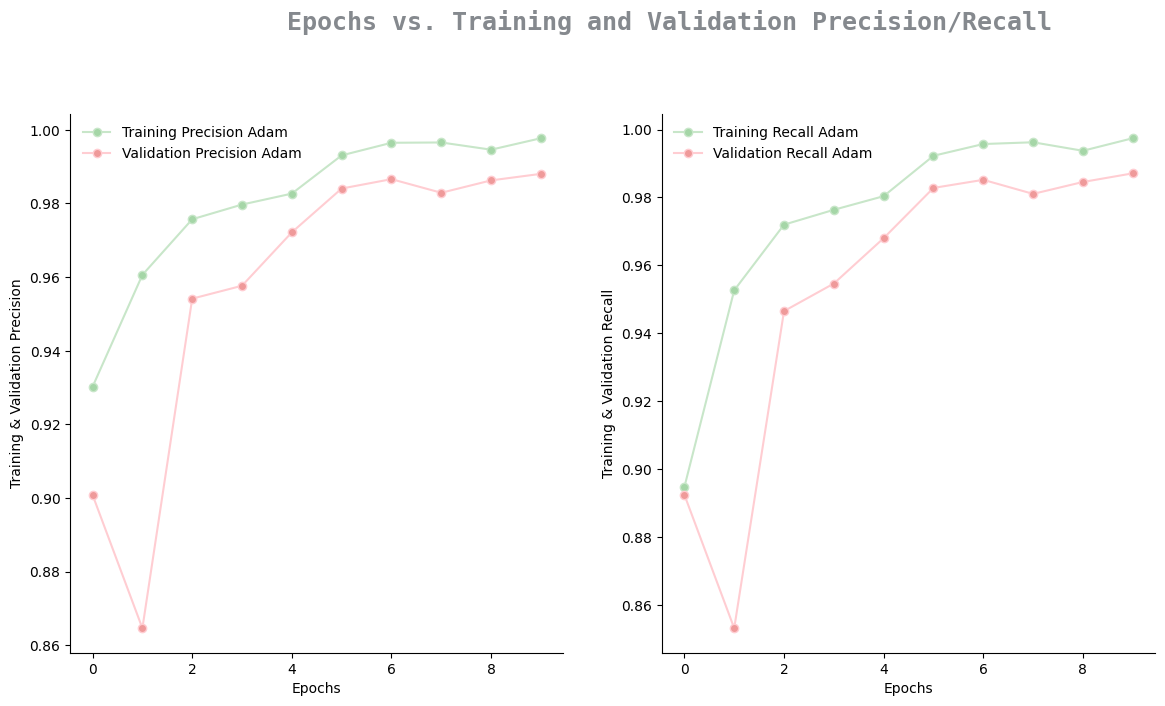

In [ ]:
filterwarnings('ignore')
epochs = [i for i in range(n_epochs)]
fig1, ax = plt.subplots(1,2,figsize=(14,7))
fig1.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, mean1_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3], label = 'Training Accuracy Adam')
ax[0].plot(epochs, mean1_valacc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],label = 'Validation Accuracy Adam')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training & Validation Accuracy')

sns.despine()
ax[1].plot(epochs, mean1_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss Adam')
ax[1].plot(epochs, mean1_valloss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],label = 'Validation Loss Adam')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig1.show()


fig2, ax = plt.subplots(1,2,figsize=(14,7))
fig2.text(s='Epochs vs. Training and Validation Precision/Recall',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, mean1_prec, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Precision Adam')
ax[0].plot(epochs, mean1_valprec, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Precision Adam')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training & Validation Precision')

sns.despine()
ax[1].plot(epochs, mean1_rec, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Recall Adam')
ax[1].plot(epochs, mean1_valrec, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Recall Adam')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Recall')

fig2.show()

In [ ]:
Val_acc1 = np.array(VALIDATION_ACCURACY1)
mean_acc1 = np.mean(Val_acc1)
Val_loss1 = np.array(VALIDATION_LOSS1)
mean_loss1 = np.mean(Val_loss1)

In [ ]:
print("The mean training accuracy is:")
print(mean1_acc[9])

Val_acc1 = np.array(VALIDATION_ACCURACY1)
mean_acc1 = np.mean(Val_acc1)

print("=========================")
print("The mean validation accuracy is:")
print(mean_acc1)


print("=========================")
print("The mean training loss is:")
print(mean1_loss[9])

Val_loss1 = np.array(VALIDATION_LOSS1)
mean_loss1 = np.mean(Val_loss1)

print("=========================")
print("The mean validation loss is:")
print(mean_loss1)

The mean training accuracy is:
0.99757319688797
The mean validation accuracy is:
0.988701605796814
The mean training loss is:
0.00787651645950973
The mean validation loss is:
0.04127410091459751


### gradcam

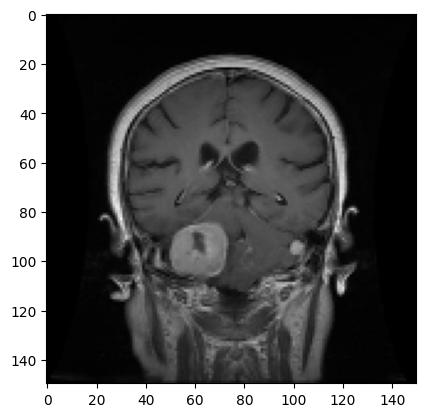

In [ ]:
last_conv_layer_name = "top_activation"

img_array = X_train[4545]
plt.imshow(img_array)

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

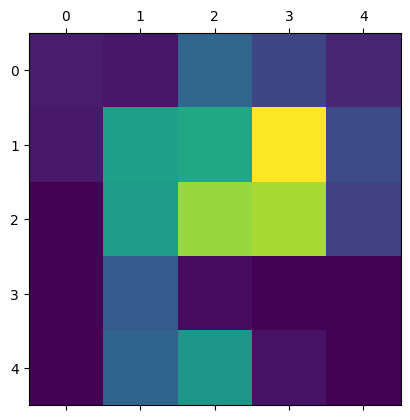

In [ ]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

plt.matshow(heatmap)
plt.show()

In [ ]:
def get_gradcam(img, heatmap, alpha=1):
    # reescalando
    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    return superimposed_img

Text(0.5, 1.0, 'Grad-CAM')

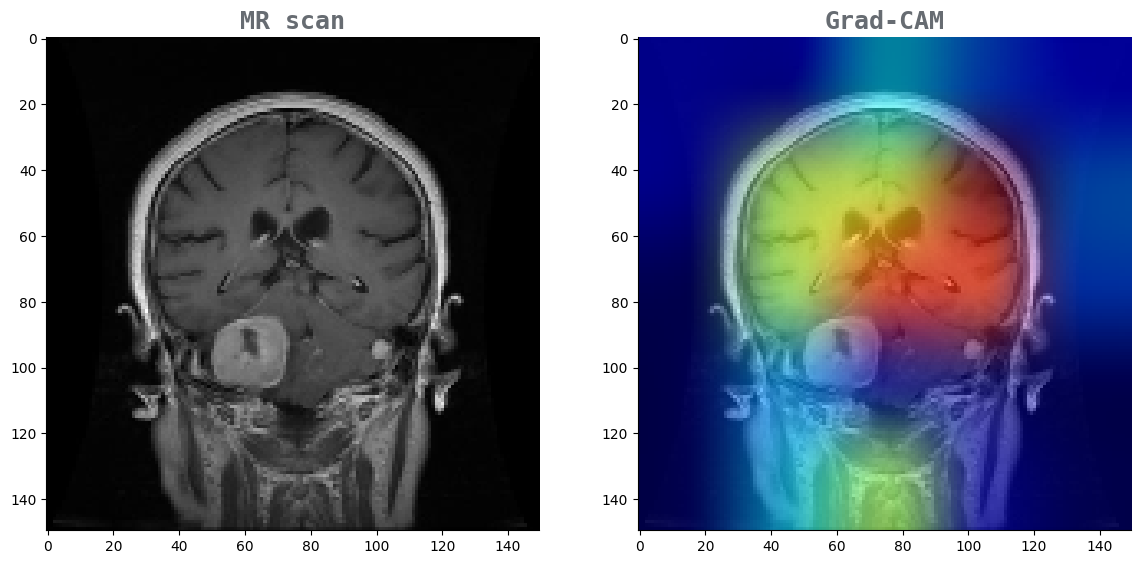

In [ ]:
superimposed_img = get_gradcam(img_array, heatmap)
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

fig, axs = plt.subplots(1,2,figsize=(14,7))

sns.despine()
axs[0].imshow(img_array)
axs[0].set_title('MR scan',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1])

sns.despine()
axs[1].imshow(superimposed_img)
axs[1].set_title('Grad-CAM',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1])

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 3s 58ms/step


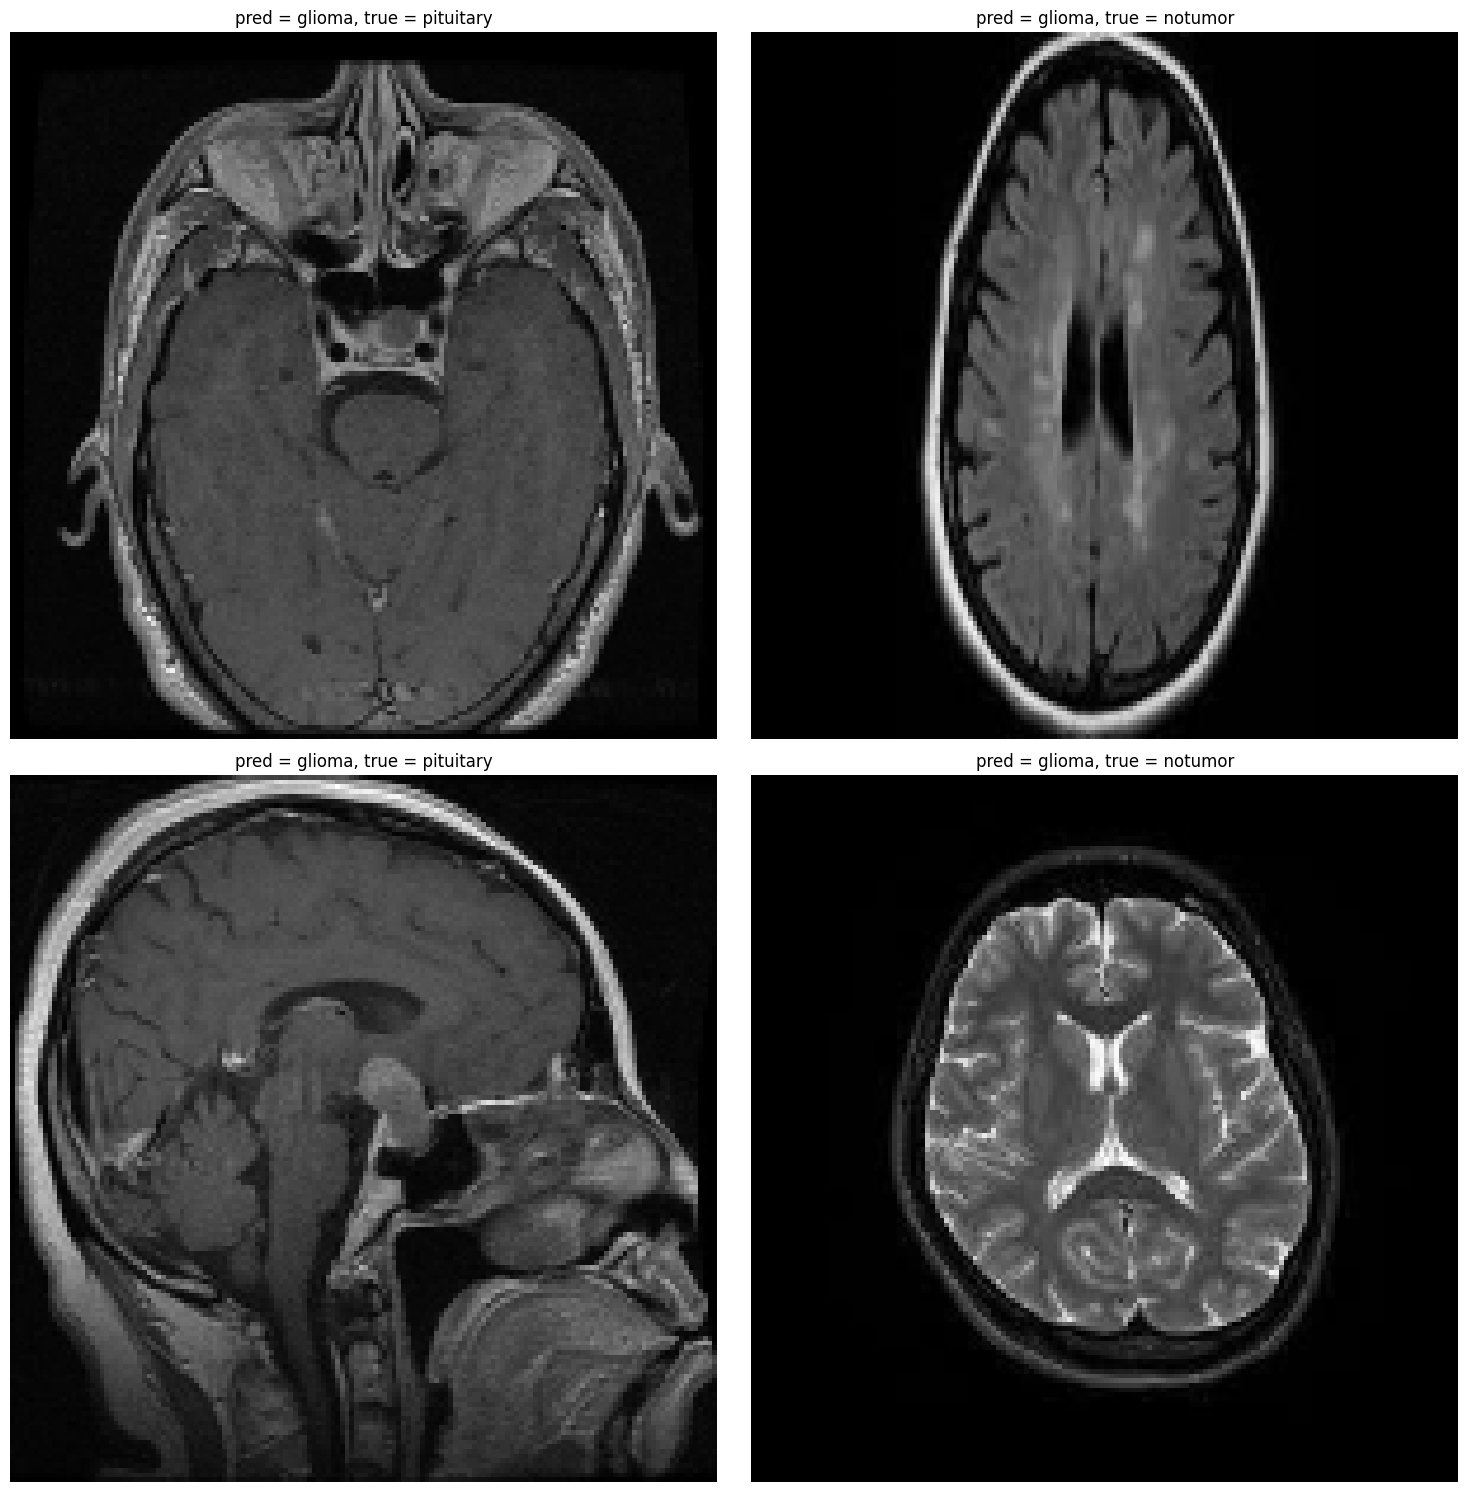

In [ ]:
indices = [i for i in range(len(y_test_new)) if y_test_new[i] != pred[i]]
wrong_pred = X_test[indices,:,:,:]

n = 4
ncol = 2
nrow = 2

fig = plt.figure(figsize=(15,15))
ax= []
for i in range(n):
    ax.append(fig.add_subplot(nrow, ncol, i+1) )
    ax[i].set_title('pred = {pred}, true = {true}'.format(pred=labels[pred[indices[i]]], true=labels[y_test_new[indices[i]]]))
    ax[i].axis('off')
    plt.imshow(wrong_pred[i])
fig.tight_layout(pad=1.0)

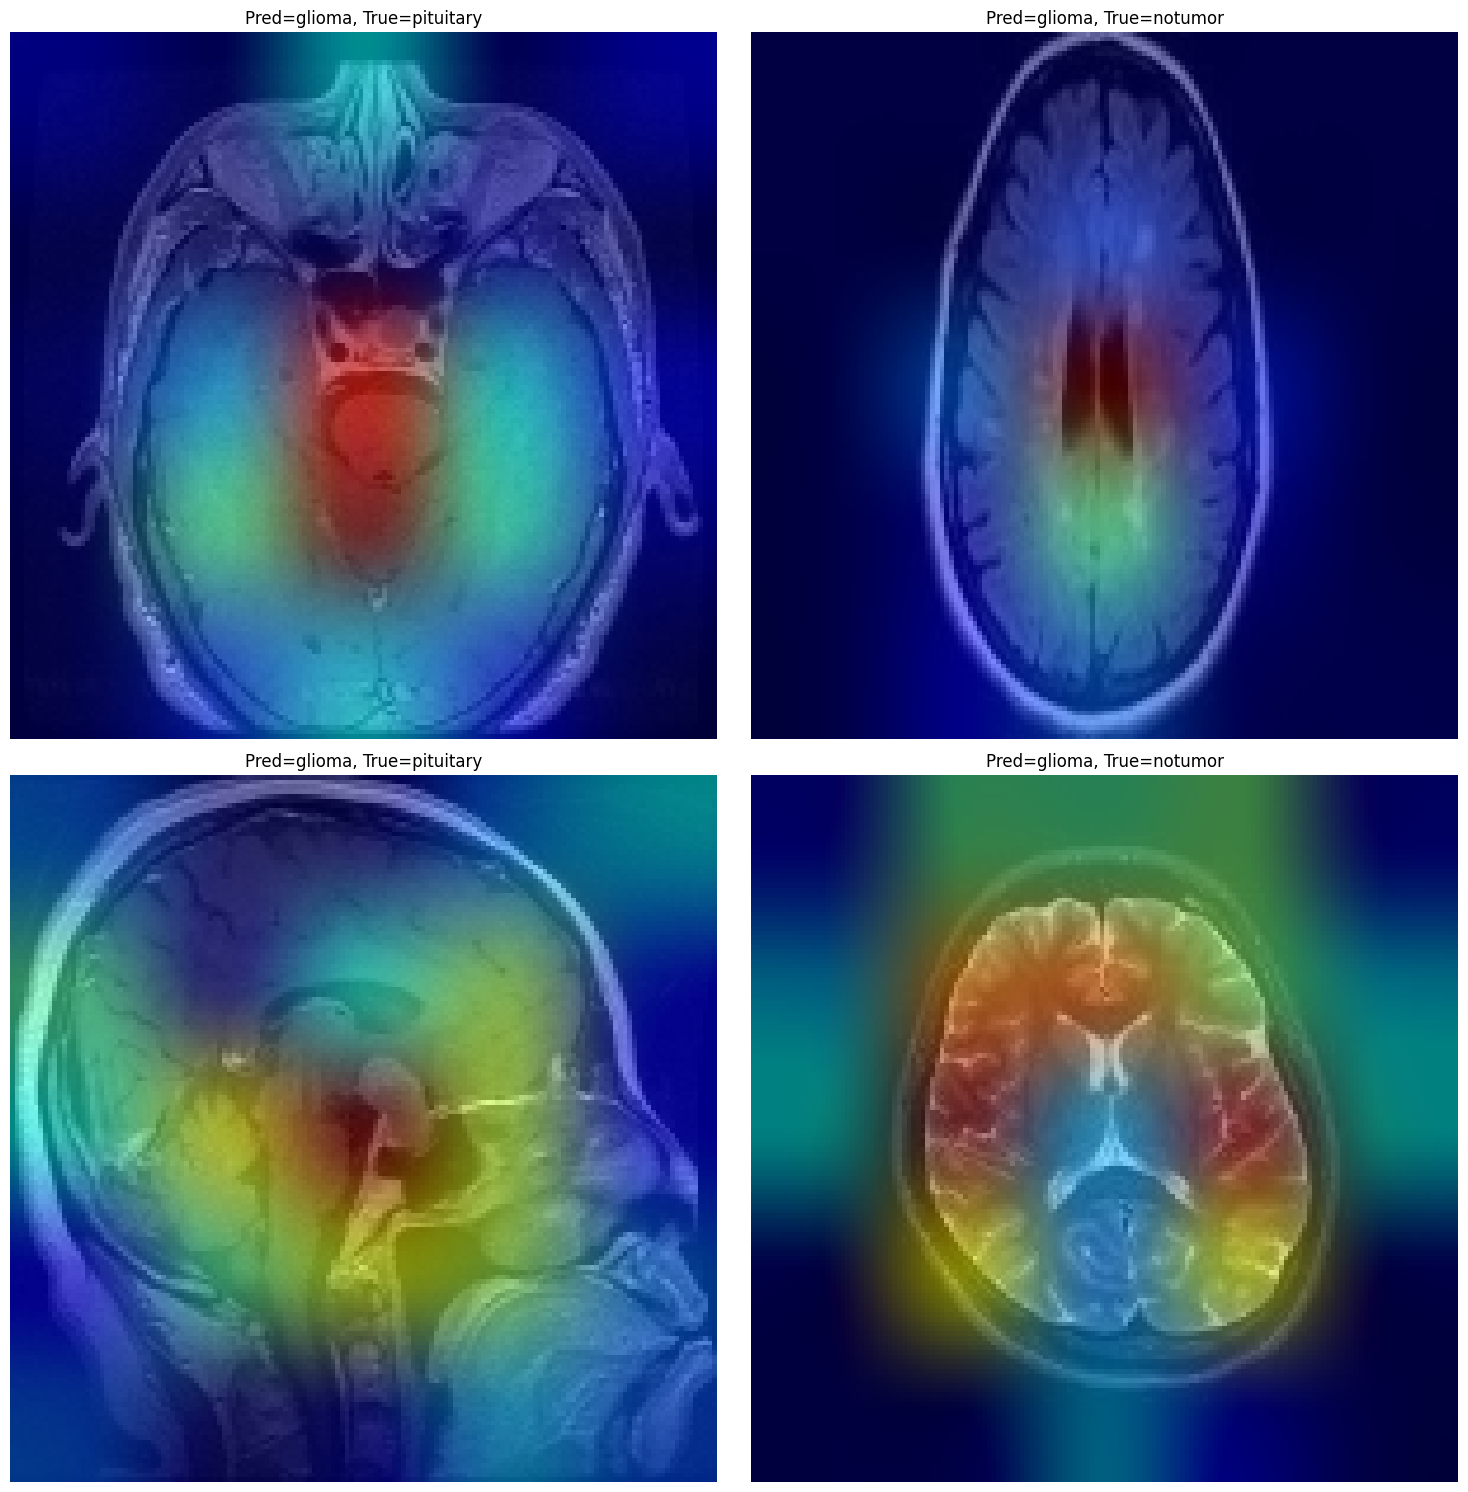

In [ ]:
indices = [i for i in range(len(y_test_new)) if y_test_new[i] != pred[i]]
wrong_pred = X_test[indices,:,:,:]

fig = plt.figure(figsize=(15,15))
ax= []
for i in range(n):
    heatmap = make_gradcam_heatmap(wrong_pred[i], model, last_conv_layer_name)
    superimposed_img = get_gradcam(wrong_pred[i], heatmap)
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    ax.append(fig.add_subplot(nrow, ncol, i+1) )
    ax[i].set_title('Pred={pred}, True={true}'.format(pred=labels[pred[indices[i]]], true=labels[y_test_new[indices[i]]]))
    ax[i].axis('off')
    plt.imshow(superimposed_img)
fig.tight_layout(pad=1.0)

### treinamento único

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [ ]:
print(len(model.layers))

241


In [ ]:
start_time_unique = time.time()

history = model.fit(X_train,y_train,validation_split=0.2, epochs = 30, verbose=1, batch_size=32,
                   callbacks=reduce_lr)

final_time_unique = time.time() - start_time_unique
print(f"Tempo de execução para os treinamento único: {final_time_unique}s")

Epoch 1/30
158/158 [==============================] - 54s 150ms/step - loss: 0.2947 - accuracy: 0.8974 - precision: 0.9310 - recall: 0.9004 - f1-score: 0.9130 - val_loss: 0.3024 - val_accuracy: 0.9069 - val_precision: 0.9104 - val_recall: 0.9053 - val_f1-score: 0.9046 - lr: 0.0010
Epoch 2/30
158/158 [==============================] - 22s 140ms/step - loss: 0.1341 - accuracy: 0.9537 - precision: 0.9585 - recall: 0.9511 - f1-score: 0.9519 - val_loss: 0.0860 - val_accuracy: 0.9690 - val_precision: 0.9705 - val_recall: 0.9682 - val_f1-score: 0.9674 - lr: 0.0010
Epoch 3/30
158/158 [==============================] - 22s 138ms/step - loss: 0.0782 - accuracy: 0.9733 - precision: 0.9753 - recall: 0.9722 - f1-score: 0.9722 - val_loss: 0.0839 - val_accuracy: 0.9737 - val_precision: 0.9745 - val_recall: 0.9730 - val_f1-score: 0.9728 - lr: 0.0010
Epoch 4/30
158/158 [==============================] - 22s 138ms/step - loss: 0.0710 - accuracy: 0.9809 - precision: 0.9820 - recall: 0.9787 - f1-score: 0.

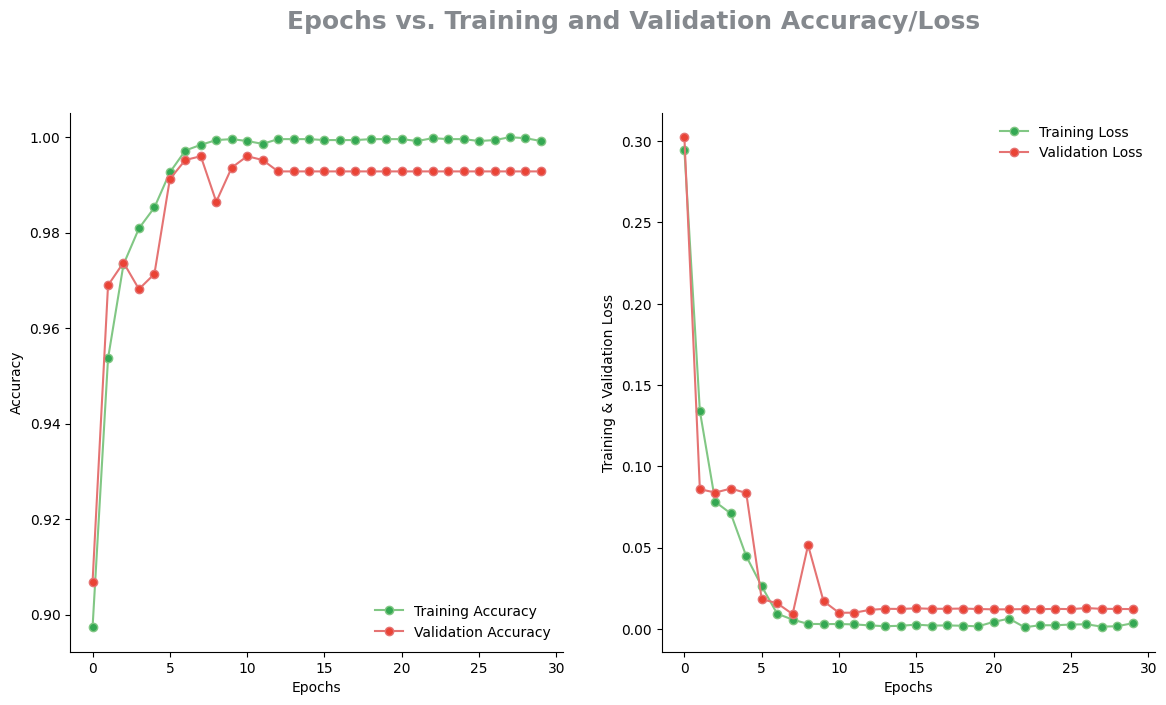

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(30)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[0],color=colors_green[1],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[0],color=colors_red[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 2s 32ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       0.99      1.00      1.00       190
           2       1.00      0.97      0.98       165
           3       0.98      1.00      0.99       171

    accuracy                           0.99       699
   macro avg       0.99      0.99      0.99       699
weighted avg       0.99      0.99      0.99       699



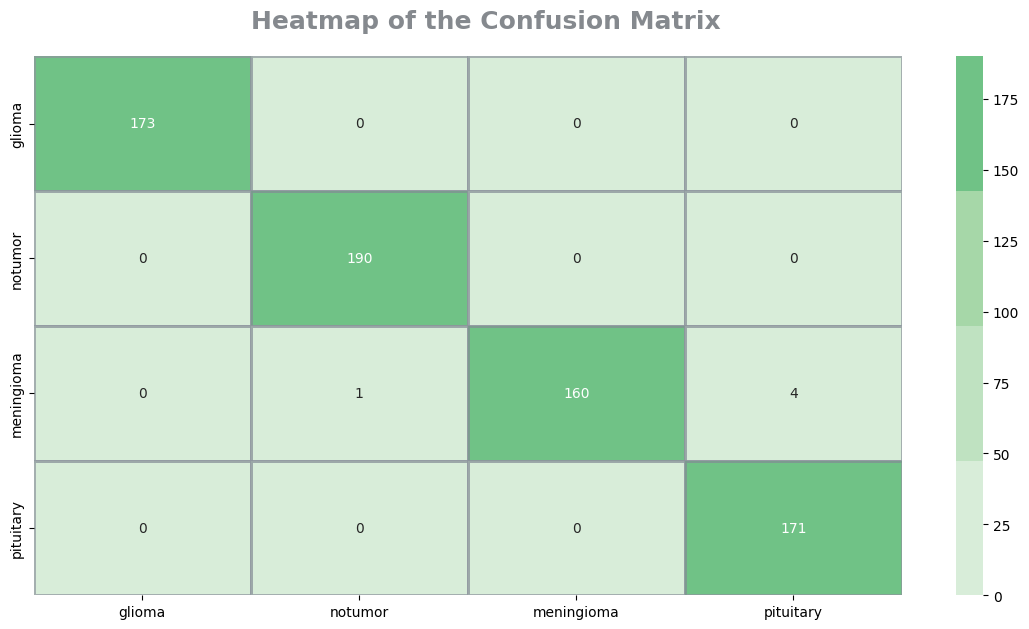

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[-2::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3],fmt='g')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='GLIOMA'
    elif p==1:
        p = 'NO TUMOR'
    elif p==2:
        p='MENINGIOMA'
    else:
        p='PITUITARY'

    print(f'{p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='PREDICT')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])